1.Загрузить файл hr.csv.

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6.Рассчитать сколько работников работает в каждом департаменте.

7.Показать распределение сотрудников по зарплатам.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

9.Сколько сотрудников покинули компанию.

10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

11.Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте
 
==============================================================================================

Пояснения к колонкам)

satisfaction_level - уровень удовлетворенности работой

last_evaluation - уровень последней оценки работы

number_project -количество проектов

average_montly_hours - среднее количество часов в месяц работы

time_spend_company - шкала от 2 до 10, отражающее время работы в компании

Work_accident - наличие инцидента на рабочем месте

left - ушел ли работник или нет

promotion_last_5years - факт повышения в течение 5 лет

sales - департамент работника

salary - уровень зарплаты

# 1.Загружаем данные HR отдела

In [1]:
import pandas as pd

In [2]:
hr = pd.read_csv('hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
#Проверка на наличие NaN значений 
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2.Произведем расчет основных статистик для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

1. Ввиду присуствия категориальных переменных проведем их преобразование. Создаем n-ое кол-во признаков, все из которых равны нулю за исключением одного. На позицию, соответствующую численному значению признака мы помещаем 1. Используем pd.get_dummies(hr).
2. Для столбца salary можно воспользоваться LabelEncoder, так как условно он разбит на 3 равных класса(зависит от начальных данных). А так же желательно учитывать, чтобы лейбл, к примеру, с меньшим доходом соотвествовал "1", то есть от меньшего к большему. 

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le=LabelEncoder()
le.fit(hr['salary'])
le.classes_

array(['high', 'low', 'medium'], dtype=object)

In [5]:
hr_encoded = pd.read_csv('HR.csv')
hr_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hr_encoded['salary']=le.transform(hr_encoded['salary'])
hr_encoded=pd.DataFrame(hr_encoded, columns=hr.columns)
hr_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [7]:
hr_encoded=pd.get_dummies(hr_encoded)
hr_encoded.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.347290,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.625819,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Можно было воспользоваться LabelEncoder и для стоблбца sales, но для рассчета статистик это однозначно не подходит, так как веса у переменных могут не соотвествовать действительности.

# 3. Визуализируем корреляционную матрицу для переменных.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

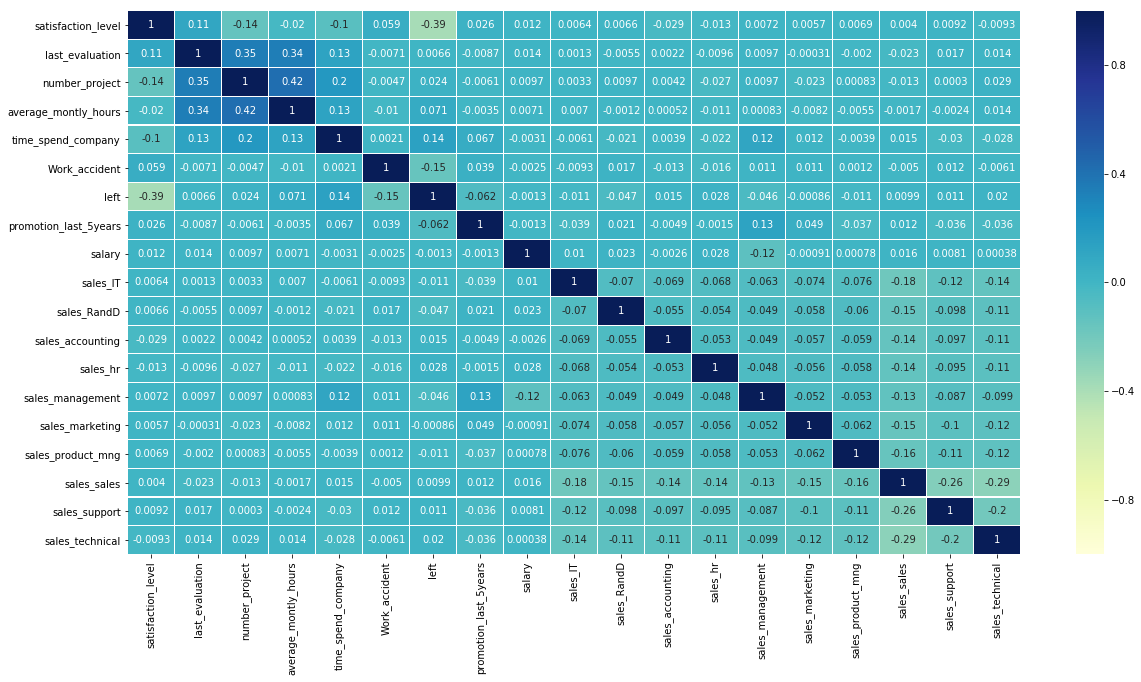

In [10]:
sns.heatmap(hr_encoded.corr(),cmap="YlGnBu", vmin=-1, vmax=1,  linewidths=0.1, annot=True)
plt.rcParams['figure.figsize'] = (20,10)

Нормализуем данные и убедимся в том, что корреляция останется прежней, так как при расчете Пирсона проводится нормирование данных. Но все же убедимся в этом.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
hr_scaled=scaler.fit_transform(hr_encoded)
hr_scaled=pd.DataFrame(hr_scaled, columns=hr_encoded.columns)
hr_scaled.head()

C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\89517_000\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,1.788917,-0.147412,-0.554955,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,1.788917,-0.147412,1.043004,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,1.788917,-0.147412,1.043004,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,1.788917,-0.147412,-0.554955,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,1.788917,-0.147412,-0.554955,-0.298486,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655


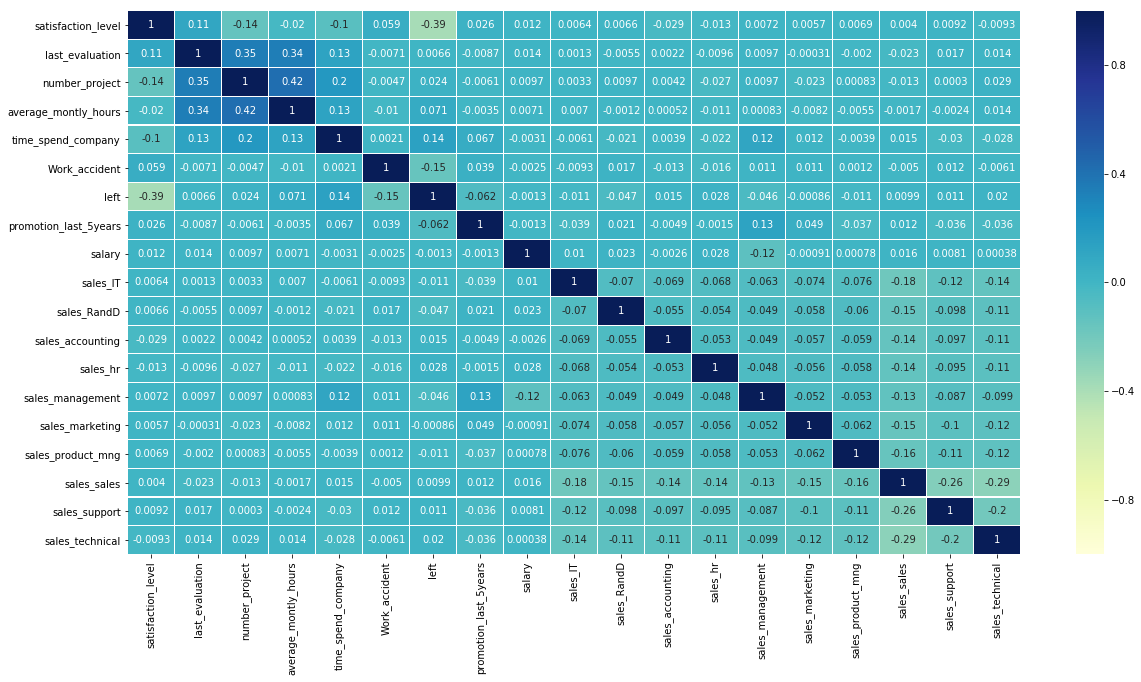

In [13]:
sns.heatmap(hr_scaled.corr(method='pearson'),cmap="YlGnBu", vmin=-1, vmax=1,  linewidths=0.1, annot=True)
plt.rcParams['figure.figsize'] = (20,10)


***Для определения кореляционной связи был использован КРИТЕРИЙ КОРРЕЛЯЦИИ ПИРСОНА. Критерий корреляции Пирсона позволяет определить, какова теснота (или сила) корреляционной связи между двумя показателями, измеренными в количественной шкале. При помощи дополнительных расчетов можно также определить, насколько статистически значима выявленная связь. При отрицательном коэффициенте Пирсона зависимость обратная, при положительном - прямая.***

Коэффициент Пирсона набольшее значение имеет при следующих параметрах: 

    satisfaction_level (уровень удовлетворенности работой) - left (ушел ли работник или нет)
    last_evaluation (уровень последней оценки работы) - number_project (количество проектов)
    average_montly_hours (среднее количество часов в месяц работы) - number_project (количество проектов)
    last_evaluation (уровень последней оценки работы) - average_montly_hours (среднее количество часов в месяц работы)


# 4. Визуализируем несколько взаимосвязей между переменными.

Возбмем наиболее коррелирующие параметры

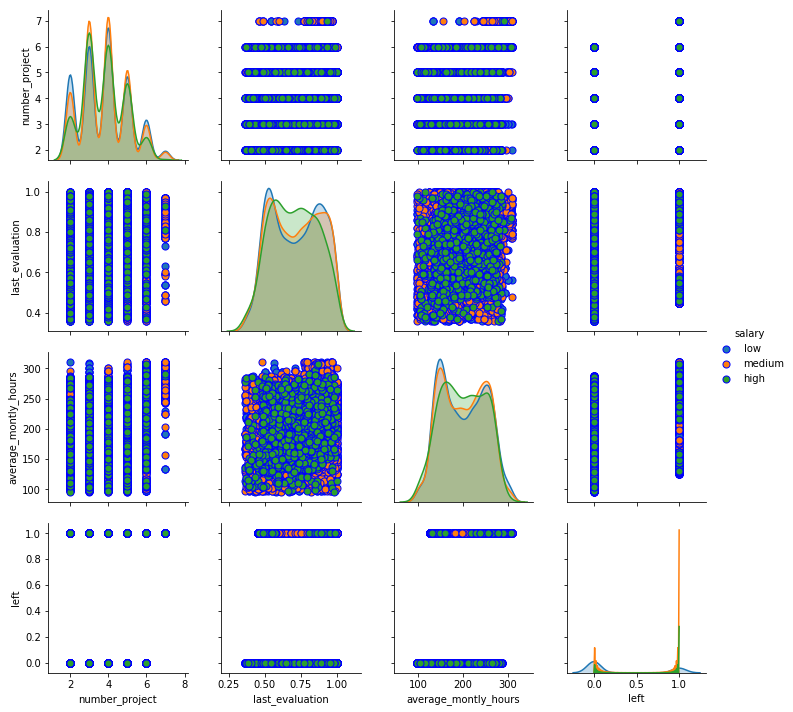

In [42]:
sns.pairplot(hr[['number_project', 'last_evaluation', 'average_montly_hours', 'left','salary']],diag_kind="kde", hue="salary" ,plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))


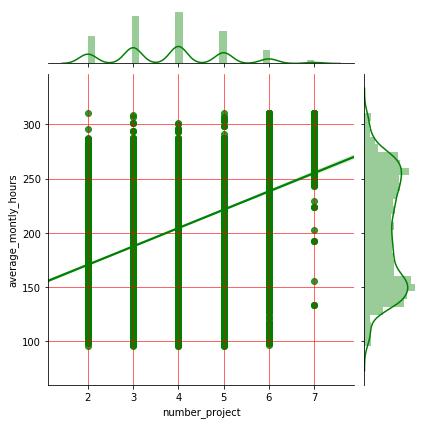

In [31]:
# Зависимость и распределение кол-ва проектов от среднего количества часов работы в месяц.
sns.jointplot(x=hr['number_project'], y=hr['average_montly_hours'], kind='reg',color='g' )
plt.grid(color='r', linestyle='-', linewidth=0.6)

Очевидные выводы можно сделать исходя из графиков выше. 
1. По графику кол-ва проектов можно заметить, что кол-во людей с минимальным доходом больше при том случае когда у людей проектов мало или очень много(относительно кол-ва проектов в текущих данных). Это, скорее всего, можно объянить тем, что работники либо ленятся(мало проектов), либо это менее сложные проекты(много проектов). Конечно, для более точного определения данной гипотезы требуется больше данных и фактов. 
2. Так же по графикам видно что преобладающее число проектов составляет около 4.
3. Так же в основном, у кого больше проектов, тому требуется больше рабочего времени.

# 5.С использованием t-test статистики проверим взаимосвязи между несколькими переменными.

С помощью t-критерия Стьюдента (которым оценивали качество пива Гиннесс(Госсет 1908г)). С помощью данного критерия мы проверяем находятся ли средние значения в доверительном интервале(95% от выборки) или нет. То есть при получении рvalue>=0,05(уровень значимости) мы можем сказать, что среденее значение лежит в доверительном интервале. 

Примечание: нельзя использовать нормированные данные, так как любое значение с вероятностью, которая стремится к 100%, то есть однозначно будет в доверительном интервале или в диапазоне 3-ех сигм (правило 3 сигм).

Проверим данные на ранее найденных кореляционных параметрах

        satisfaction_level (уровень удовлетворенности работой) - left (ушел ли работник или нет)
        last_evaluation (уровень последней оценки работы) - number_project (количество проектов)
        average_montly_hours (среднее количество часов в месяц работы) - number_project (количество проектов)
        last_evaluation (уровень последней оценки работы) - average_montly_hours (среднее количество часов в месяц работы)

In [43]:
from scipy import stats

In [56]:
print(stats.ttest_ind(hr['satisfaction_level'], hr['left']))
print(stats.ttest_ind(hr['last_evaluation'], hr['number_project']))
print(stats.ttest_ind(hr['average_montly_hours'], hr['number_project']))
print(stats.ttest_ind(hr['last_evaluation'], hr['average_montly_hours']))

Ttest_indResult(statistic=93.06077566920372, pvalue=0.0)
Ttest_indResult(statistic=-303.8042100031241, pvalue=0.0)
Ttest_indResult(statistic=483.54229603425085, pvalue=0.0)
Ttest_indResult(statistic=-491.25647025928, pvalue=0.0)


Все значания уровня значимости равны 0, значит,  о равенстве средних говорить нельзя.

# 6. Рассчитаем сколько сотрудников работает в каждом департаменте.

In [163]:
# Сколько сотрудников работало всего, с учетом уволишихся
common_workers=pd.DataFrame(hr['sales'].value_counts().reset_index()).rename(columns={"index":"department","sales":"count_of_workers"} )
common_workers

,department,count_of_workers
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


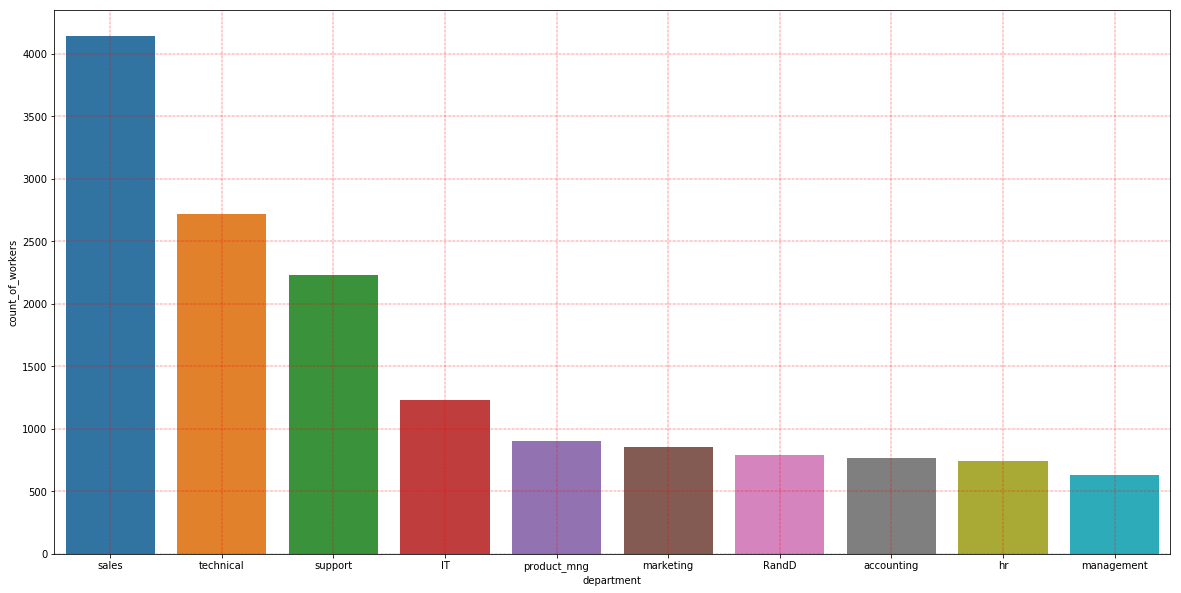

In [164]:
sns.barplot(y=common_workers['count_of_workers'], x=common_workers['department'])
plt.grid(color='r', linestyle='-.', linewidth=0.4)


In [338]:
# оставим только данные со значением ==0, то есть только тех, которые продолжают работать в данной компании
hr.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [339]:
without_leave=hr[['left', 'sales']]
without_leave=without_leave[hr['left']==0]
without_leave.drop(columns=['left'], inplace= True)

In [340]:
without_leave=without_leave['sales'].value_counts().reset_index().rename(columns={"index":"department","sales":"count_of_workers"} )

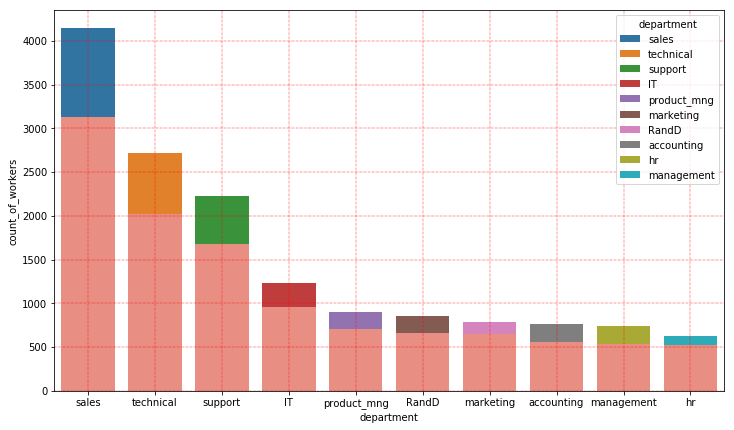

In [341]:
# Объединим данные всех сотрудников и сотрудников, которые работают до сих пор.
sns.barplot(y=common_workers['count_of_workers'], x=common_workers['department'], hue=common_workers['department'], dodge=False)
sns.barplot(y=without_leave['count_of_workers'], x=without_leave['department'], color='salmon')

plt.grid(color='r', linestyle='-.', linewidth=0.4)


# 7.Покажем распределение сотрудников по зарплатам.

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

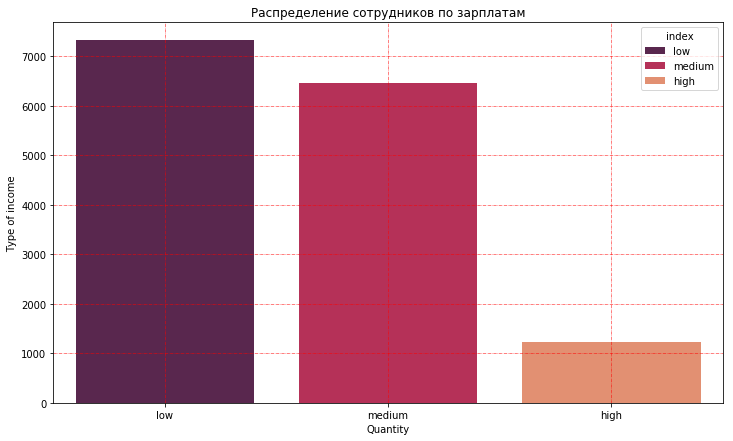

In [442]:
incomes=hr['salary'].value_counts().reset_index()
sns.barplot(incomes['index'],incomes['salary'], palette="rocket", hue=incomes['index'], dodge=False)
plt.grid(color='r', linestyle='-.', linewidth=0.5)
plt.rcParams['figure.figsize'] = (12,7)
plt.xlabel('Quantity')
plt.ylabel('Type of income')
plt.title('Распределение сотрудников по зарплатам')


Большинство в компании с низким уровнем дохода. И недалеко ушел средний класс в процентном соотношении.

In [300]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [301]:
hr['salary'].value_counts(int)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

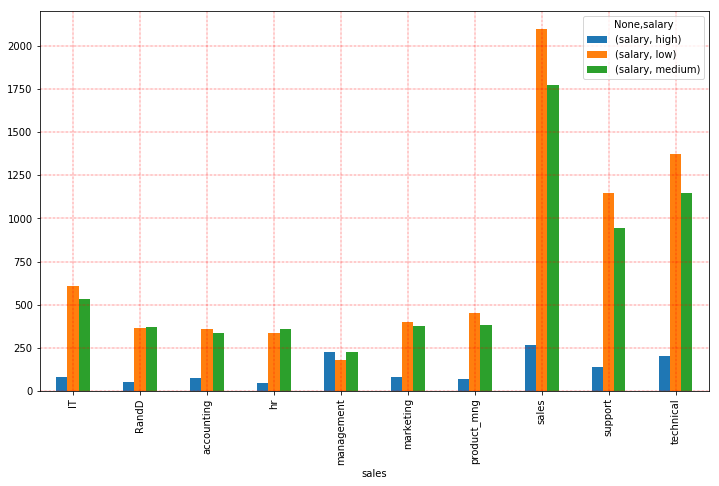

In [334]:
hr[['sales','salary']].groupby(['sales','salary']).agg({'salary':'count'}).unstack().plot(kind='bar')
plt.grid(color='r', linestyle='-.', linewidth=0.4)

Отдел продаж самый многочисленный, соотвественно, и кол-во людей с высоким доходом больше всех отделов. Но в отделе менеджмента в процентном соотношении больше относительно других отделов. То есть в данном отделе предполжительно работает руководящий состав компании.

# 9.Сколько сотрудников покинули компанию.

Используем ранее подготовленные данные

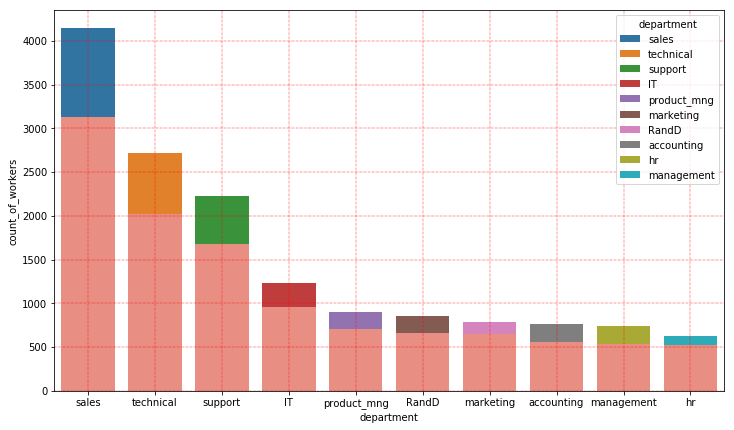

In [342]:
# Объединим данные всех сотрудников и сотрудников, которые работают до сих пор.
sns.barplot(y=common_workers['count_of_workers'], x=common_workers['department'], hue=common_workers['department'], dodge=False)
sns.barplot(y=without_leave['count_of_workers'], x=without_leave['department'], color='salmon')

plt.grid(color='r', linestyle='-.', linewidth=0.4)

In [348]:
print('Кол-во сотрудников покинувших компанию', common_workers['count_of_workers'].sum()- without_leave['count_of_workers'].sum())

Кол-во сотрудников покинувших компанию 3571


In [351]:
common_workers['left_in_percent']=(common_workers['count_of_workers']-without_leave['count_of_workers'])/common_workers['count_of_workers']

In [352]:
common_workers

,department,count_of_workers,left_in_percent
0,sales,4140,0.244928
1,technical,2720,0.256250
2,support,2229,0.248991
3,IT,1227,0.222494
4,product_mng,902,0.219512
5,marketing,858,0.223776
6,RandD,787,0.167726
7,accounting,767,0.265971
8,hr,739,0.270636
9,management,630,0.168254


Text(0.5, 1.0, 'Уволившиеся сотрудники по каждому отделу в процентном соотношении')

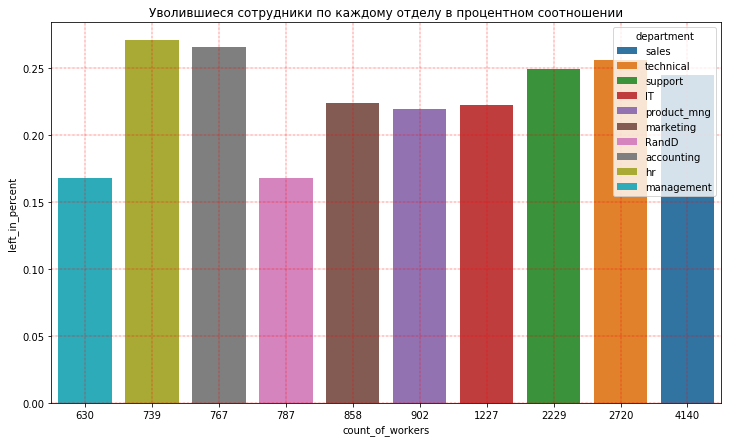

In [358]:
sns.barplot(x=common_workers['count_of_workers'],y=common_workers['left_in_percent'], hue = common_workers['department'], dodge=False )
plt.grid(color='r', linestyle='-.', linewidth=0.4)
plt.title('Уволившиеся сотрудники по каждому отделу в процентном соотношении')

Относительно большая текучка в hr отделе, а высшее руководство "держится" стабильно.

# 10.Проверим несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

Для проверки теорий воспользуемся t-критерием Стьюдента.
Тест измеряет насколько среднеквадратичное значение меняется среди выборок. Если мы получаем высокое p-value, например, выше 0.05 или 0.1, тогда мы не можем отвергнуть нулевую гипотезу о том, что среднее значения идентичны. Если p-value меньше, чем 1% (или 5%), то мы отвергаем нулевую гипотезу.


Для наглядности составим таблицу, в которой будет показана дельта по средним показателям каждого параметра в процентах

In [404]:
df1=pd.melt(pd.DataFrame([hr_encoded.groupby('left').mean().reset_index().stack()[0]]))

In [405]:
df2=pd.melt(pd.DataFrame([hr_encoded.groupby('left').mean().reset_index().stack()[1]]))
df2

,variable,value
0,left,1.000000
1,satisfaction_level,0.440098
2,last_evaluation,0.718113
3,number_project,3.855503
4,average_montly_hours,207.419210
5,time_spend_company,3.876505
6,Work_accident,0.047326
7,promotion_last_5years,0.005321
8,salary,1.345842
9,sales_IT,0.076449


In [411]:
df=pd.merge(df1,df2, how='inner', on='variable').rename(columns={'variable':'hr_params', 'value_x':'means_of_stay','value_y':'means_of_left'}).drop([0])
df.head()

,hr_params,means_of_stay,means_of_left
1,satisfaction_level,0.666810,0.440098
2,last_evaluation,0.715473,0.718113
3,number_project,3.786664,3.855503
4,average_montly_hours,199.060203,207.419210
5,time_spend_company,3.380032,3.876505


Получаем искомую таблицу

In [414]:
df['delta_percent']=round((df.means_of_stay-df.means_of_left)/df.means_of_stay*100)
df

,hr_params,means_of_stay,means_of_left,delta_percent
1,satisfaction_level,0.666810,0.440098,34.0
2,last_evaluation,0.715473,0.718113,-0.0
3,number_project,3.786664,3.855503,-2.0
4,average_montly_hours,199.060203,207.419210,-4.0
5,time_spend_company,3.380032,3.876505,-15.0
6,Work_accident,0.175009,0.047326,73.0
7,promotion_last_5years,0.026251,0.005321,80.0
8,salary,1.347742,1.345842,0.0
9,sales_IT,0.083479,0.076449,8.0
10,sales_RandD,0.058278,0.033884,42.0


Исходя из приведенной таблицы выше видно, что на уволнение влияют достаточно сильно (в процентномсоотношении) следующие параметры: уровень удовлетворенности, наличие инцидента на рабочем месте(но очень странно, так как в среднем инцидентов было больше у тех, кто остался),факт повышения в течение 5 лет. А так же в среднем по колнке сколько времение человек провел в компании видно, что вероятность, что человек уволится после нескольких лет работы немного выше.  

Применим односторонний критерий Стюарта(но и убедимся в том, что pvalue для двустороннего теста принимает те же значения, то есть < 0,05). Где берем работников, работающих на данный момент и среднее значение по данному признаку для тех, кто покинул компанию.

In [447]:
print(stats.ttest_1samp(hr[ hr['left'] == 0]['satisfaction_level'], 0.440098))
print(stats.ttest_ind(hr[ hr['left'] == 0]['satisfaction_level'], hr[ hr['left'] == 1]['satisfaction_level']))

Ttest_1sampResult(statistic=111.6327196866223, pvalue=0.0)
Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


In [448]:
print(stats.ttest_1samp(hr[ hr['left'] == 0]['Work_accident'], 0.047326))
print(stats.ttest_ind(hr[ hr['left'] == 0]['Work_accident'], hr[ hr['left'] == 1]['Work_accident']))

Ttest_1sampResult(statistic=35.920617176476604, pvalue=8.067065563006212e-268)
Ttest_indResult(statistic=19.165804033090176, pvalue=6.613049400453939e-81)


In [449]:
print(stats.ttest_1samp(hr[ hr['left'] == 0]['promotion_last_5years'], 0.005321))
print(stats.ttest_ind(hr[ hr['left'] == 0]['promotion_last_5years'], hr[ hr['left'] == 1]['promotion_last_5years']))

Ttest_1sampResult(statistic=13.994032349853823, pvalue=3.919062341524298e-44)
Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)
